Linear regression using scikit-learn.
Dataset:
  This data set is from UCI, contains 9568 data points collected from a Combined Cycle Power Plant over 6 years (2006-2011), when the plant was set to work with full load.

Des: http://archive.ics.uci.edu/ml/datasets/Combined+Cycle+Power+Plant
ftp: http://archive.ics.uci.edu/ml/machine-learning-databases/00294/

In [2]:
# import libs
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import pandas as pd
from sklearn import datasets, linear_model
from sklearn.model_selection import train_test_split
from sklearn import metrics

In [36]:
# read data
data = pd.read_csv("../../data/CCPP/Folds5x2_pp_1.csv")
data.head()


,AT,V,AP,RH,PE
0,14.96,41.76,1024.07,73.17,463.26
1,25.18,62.96,1020.04,59.08,444.37
2,5.11,39.40,1012.16,92.14,488.56
3,20.86,57.32,1010.24,76.64,446.48
4,10.82,37.50,1009.23,96.62,473.90


In [37]:
features = ['AT', 'V', 'AP', 'RH']
target = "PE"

In [38]:
# Prepare X, y
X = data[features]
y = data[[target]]

In [39]:
# Use model_selection.train_test_split to split data to training set and testing set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=1)

In [40]:
print X_train.shape
print y_train.shape
print X_test.shape
print y_test.shape

(7654, 4)
(7654, 1)
(1914, 4)
(1914, 1)


In [41]:
# Apply Linear Regression 
from sklearn.linear_model import LinearRegression
linreg = LinearRegression()
linreg.fit(X_train, y_train)


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [42]:
print linreg.intercept_
print linreg.coef_

[459.9472129]
[[-1.96874028 -0.23852978  0.05697873 -0.15933335]]


In [93]:
# model predict, calculate test error
y_predict = linreg.predict(X_test)

print("MSE : %.4f" % metrics.mean_squared_error(y_test, y_predict))
print("RMSE: %.4f" % np.sqrt(metrics.mean_squared_error(y_test, y_predict)))

MSE : 20.3300
RMSE: 4.5089


In [107]:

from sklearn.model_selection import cross_val_predict
y_predict = cross_val_predict(linreg, X, y, cv=10)

print("MSE : %.4f" % metrics.mean_squared_error(y, y_predict))
print("RMSE: %.4f" % np.sqrt(metrics.mean_squared_error(y, y_predict)))


MSE : 20.7937
RMSE: 4.5600


In [100]:
# feature selection with RFE (recursive feature elimination)
from sklearn.feature_selection import RFE

model = LinearRegression()
rfe = RFE(estimator=model, step=1)
rfe.fit(X, y.values.ravel())
bestModel = rfe.estimator_

selectedFeatures = [features[i] for i in range(len(features)) if rfe.support_[i]]
featuresRank = sorted(zip(map(lambda x: round(x, 4), rfe.ranking_), features))

print("Optimal number of features : %d" % rfe.n_features_)
print("Selected features : %s " % selectedFeatures)
print("Features sorted by their rank: %s" % featuresRank)


Optimal number of features : 2
Selected features : ['AT', 'V'] 
Features sorted by their rank: [(1.0, 'AT'), (1.0, 'V'), (2.0, 'RH'), (3.0, 'AP')]


Optimal number of features : 4


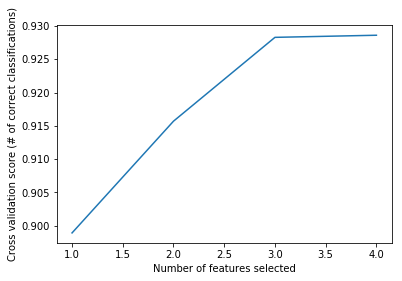

Optimal number of features : 4
Selected features : ['AT', 'V', 'AP', 'RH'] 
Features sorted by their rank: [(1.0, 'AP'), (1.0, 'AT'), (1.0, 'RH'), (1.0, 'V')]


In [88]:
# feature selection with RFECV (recursive feature elimination with cross-validation)
from sklearn.model_selection import KFold
from sklearn.feature_selection import RFECV

model = LinearRegression()
kFold = KFold(n_splits=4)
rfecv = RFECV(estimator=model, step=1, cv = kFold)
yp = y.values.ravel()
rfecv.fit(X, yp)

print("Optimal number of features : %d" % rfecv.n_features_)

# Plot number of features VS. cross-validation scores
plt.figure()
plt.xlabel("Number of features selected")
plt.ylabel("Cross validation score (# of correct classifications)")
plt.plot(range(1, len(rfecv.grid_scores_) + 1), rfecv.grid_scores_)
plt.show()

selectedFeatures = [features[i] for i in range(len(features)) if rfecv.support_[i]]
featuresRank = sorted(zip(map(lambda x: round(x, 4), rfecv.ranking_), features))

print("Optimal number of features : %d" % rfecv.n_features_)
print("Selected features : %s " % selectedFeatures)
print("Features sorted by their rank: %s" % featuresRank)
